In [1]:
import pandas as pd
import numpy as np

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

# importing training data file

In [3]:
train=pd.read_csv('C:/Users/cmscomputers/Downloads/Skype/Datasets/training_set.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Dropping un-nesassary features

In [5]:
train=train.drop('Id',axis=1)

#columns with most unique values are unnesassary

# Missing values treatment 

In [6]:
train.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

In [7]:
#features with higer missing values can be dropped

train=train.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

In [8]:
A=pd.DataFrame(train.isna().sum().sort_values(ascending=False),columns=['No_of_miss_val'])

In [9]:
A

,No_of_miss_val
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81
...,...
TotalBsmtSF,0
Heating,0
MSZoning,0
CentralAir,0


In [10]:
B=A[A.No_of_miss_val>0].index

In [11]:
B

Index(['FireplaceQu', 'LotFrontage', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure',
       'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType',
       'MasVnrArea', 'Electrical'],
      dtype='object')

In [12]:
for i in B:
    if(train[i].dtypes=='object'):
        c=train[i].mode()[0]
        train[i]=train[i].fillna(c)         #this iteration replaces missing values from categorical data
    else:
        c=train[i].mean()
        train[i]=train[i].fillna(c)         #this replaces missing values from continuous data  

In [13]:
train.isna().sum().sort_values(ascending=False)

MSSubClass     0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 76, dtype: int64

# Corelation check 

In [14]:
D=train.corr()['SalePrice'].sort_values(ascending=False)
D

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [15]:
D=pd.DataFrame(D)

In [16]:
E=D[D.SalePrice<0.15].index
E

Index(['ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2',
       'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold', 'OverallCond',
       'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')

In [17]:
import seaborn as sb

<AxesSubplot:>

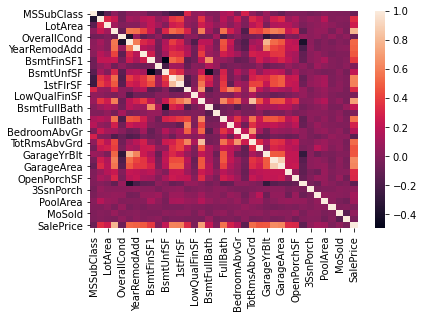

In [18]:
sb.heatmap(train.corr())

In [19]:
train=train.drop(['ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2',
       'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold', 'OverallCond',
       'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr'],axis=1)
train

#dropped features with very less or -ve corelation

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2,548,TA,TA,Y,0,61,WD,Normal,208500
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,2,460,TA,TA,Y,298,0,WD,Normal,181500
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2,608,TA,TA,Y,0,42,WD,Normal,223500
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,3,642,TA,TA,Y,0,35,WD,Abnorml,140000
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,3,836,TA,TA,Y,192,84,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,2,460,TA,TA,Y,0,40,WD,Normal,175000
1456,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,2,500,TA,TA,Y,349,0,WD,Normal,210000
1457,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,1,252,TA,TA,Y,0,60,WD,Normal,266500
1458,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,1,240,TA,TA,Y,366,0,WD,Normal,142125


# Skewness in Data

In [20]:
train.skew().sort_values(ascending=False)

LotArea         12.207688
MasVnrArea       2.676412
LotFrontage      2.384950
OpenPorchSF      2.364342
SalePrice        1.882876
BsmtFinSF1       1.685503
WoodDeckSF       1.541376
TotalBsmtSF      1.524255
1stFlrSF         1.376757
GrLivArea        1.366560
BsmtUnfSF        0.920268
2ndFlrSF         0.813030
TotRmsAbvGrd     0.676341
HalfBath         0.675897
Fireplaces       0.649565
BsmtFullBath     0.596067
OverallQual      0.216944
BedroomAbvGr     0.211790
GarageArea       0.179981
FullBath         0.036562
GarageCars      -0.342549
YearRemodAdd    -0.503562
YearBuilt       -0.613461
GarageYrBlt     -0.668175
dtype: float64

In [21]:
train2=train

In [22]:
col=['LotArea','MasVnrArea','LotFrontage','OpenPorchSF']      #features selected with skew >2

In [23]:
#before skewness treatment we have take to care of 0s in data
(train2==0).sum().sort_values(ascending=False)

HalfBath        913
MasVnrArea      861
BsmtFullBath    856
2ndFlrSF        829
WoodDeckSF      761
               ... 
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
SalePrice         0
Length: 63, dtype: int64

In [24]:
train2=train2.drop(['HalfBath'],axis=1)

#droping features with >70% 0s 

In [25]:
train2=train2.mask(train2==0).fillna(0.01)

#Removed 0s from data to perform log function becoz log of 0 is infinite

In [26]:
for i in col:
    train2[i]=np.log(train2[i])

In [27]:
train2.skew().sort_values(ascending=False)

SalePrice       1.882876
BsmtFinSF1      1.685536
WoodDeckSF      1.541466
TotalBsmtSF     1.524269
1stFlrSF        1.376757
GrLivArea       1.366560
BsmtUnfSF       0.920279
2ndFlrSF        0.813041
TotRmsAbvGrd    0.676341
Fireplaces      0.661181
BsmtFullBath    0.601606
MasVnrArea      0.402545
OverallQual     0.216944
BedroomAbvGr    0.213615
GarageArea      0.180014
FullBath        0.038960
LotArea        -0.137994
OpenPorchSF    -0.158562
GarageCars     -0.334118
YearRemodAdd   -0.503562
YearBuilt      -0.613461
GarageYrBlt    -0.668175
LotFrontage    -0.930795
dtype: float64

# Data Standardisation 

In [28]:
cat=[]
con=[]
for i in train2.columns:
    if(train2[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)                      #features separated on basis of categorical and continuous

In [29]:
cat

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [30]:
con

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

One hot Encoding for categorical data

In [31]:
train_cat=pd.DataFrame(train2[cat])
train_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


In [32]:
train_cat=pd.get_dummies(train_cat)

In [33]:
train_cat

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


for continuous data we will use StandardScalar 

In [34]:
train_con=pd.DataFrame(train2[con])
train_con

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,FullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,4.174387,9.041922,7,2003,2003,5.278115,706.00,150.00,856.0,856,...,2.0,3.0,8,0.01,2003.0,2.0,548.0,0.01,4.110874,208500
1,4.382027,9.169518,6,1976,1976,-4.605170,978.00,284.00,1262.0,1262,...,2.0,3.0,6,1.00,1976.0,2.0,460.0,298.00,-4.605170,181500
2,4.219508,9.328123,7,2001,2002,5.087596,486.00,434.00,920.0,920,...,2.0,3.0,6,1.00,2001.0,2.0,608.0,0.01,3.737670,223500
3,4.094345,9.164296,7,1915,1970,-4.605170,216.00,540.00,756.0,961,...,1.0,3.0,7,1.00,1998.0,3.0,642.0,0.01,3.555348,140000
4,4.430817,9.565214,8,2000,2000,5.857933,655.00,490.00,1145.0,1145,...,2.0,4.0,9,1.00,2000.0,3.0,836.0,192.00,4.430817,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.127134,8.976768,6,1999,2000,-4.605170,0.01,953.00,953.0,953,...,2.0,3.0,7,1.00,1999.0,2.0,460.0,0.01,3.688879,175000
1456,4.442651,9.486076,6,1978,1988,4.779123,790.00,589.00,1542.0,2073,...,2.0,3.0,7,2.00,1978.0,2.0,500.0,349.00,-4.605170,210000
1457,4.189655,9.109636,7,1941,2006,-4.605170,275.00,877.00,1152.0,1188,...,2.0,4.0,9,2.00,1941.0,1.0,252.0,0.01,4.094345,266500
1458,4.219508,9.181632,5,1950,1996,-4.605170,49.00,0.01,1078.0,1078,...,1.0,2.0,5,0.01,1950.0,1.0,240.0,366.00,-4.605170,142125


In [35]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
train_con=pd.DataFrame(ss.fit_transform(train_con),columns=con)
train_con

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,FullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,-0.084142,-0.133231,0.651479,1.050994,0.878668,1.202944,0.575422,-0.944595,-0.459304,-0.793434,...,0.789879,0.163758,0.912210,-0.949662,1.021157,0.311528,0.351000,-0.752161,0.882439,0.347273
1,0.563447,0.113442,-0.071836,0.156734,-0.429577,-0.828576,1.171993,-0.641231,0.466465,0.257140,...,0.789879,0.163758,-0.318683,0.597325,-0.104483,0.311528,-0.060734,1.626204,-1.098690,0.007288
2,0.056580,0.420061,0.651479,0.984752,0.830215,1.163783,0.092901,-0.301646,-0.313370,-0.627826,...,0.789879,0.163758,-0.318683,0.597325,0.937776,0.311528,0.631727,-0.752161,0.797611,0.536154
3,-0.333780,0.103347,0.651479,-1.863632,-0.720298,-0.828576,-0.499284,-0.061672,-0.687326,-0.521734,...,-1.026478,0.163758,0.296763,0.597325,0.812705,1.652462,0.790806,-0.752161,0.756170,-0.515281
4,0.715614,0.878409,1.374795,0.951632,0.733308,1.322126,0.463565,-0.174867,0.199679,-0.045611,...,0.789879,1.390218,1.527656,0.597325,0.896086,1.652462,1.698492,0.780180,0.955161,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.231515,-0.259188,-0.071836,0.918511,0.733308,-0.828576,-0.973010,0.873321,-0.238123,-0.542435,...,0.789879,0.163758,0.296763,0.597325,0.854395,0.311528,-0.060734,-0.752161,0.786521,-0.074560
1456,0.752524,0.725419,-0.071836,0.222975,0.151865,1.100376,0.759657,0.049260,1.104926,2.355701,...,0.789879,0.163758,0.296763,2.159938,-0.021102,0.311528,0.126418,2.033253,-1.098690,0.366161
1457,-0.036525,-0.002325,0.651479,-1.002492,1.024029,-0.828576,-0.369881,0.701265,0.215641,0.065656,...,0.789879,1.390218,1.527656,2.159938,-1.563645,-1.029405,-1.033923,-0.752161,0.878682,1.077611
1458,0.056580,0.136861,-0.795151,-0.704406,0.539493,-0.828576,-0.865561,-1.284158,0.046905,-0.218982,...,-1.026478,-1.062703,-0.934130,-0.949662,-1.188432,-1.029405,-1.090068,2.168937,-1.098690,-0.488523


In [221]:
train_stan=pd.concat([train_con,train_cat],axis=1)
train_stan

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.084142,-0.133231,0.651479,1.050994,0.878668,1.202944,0.575422,-0.944595,-0.459304,-0.793434,...,0,0,0,1,0,0,0,0,1,0
1,0.563447,0.113442,-0.071836,0.156734,-0.429577,-0.828576,1.171993,-0.641231,0.466465,0.257140,...,0,0,0,1,0,0,0,0,1,0
2,0.056580,0.420061,0.651479,0.984752,0.830215,1.163783,0.092901,-0.301646,-0.313370,-0.627826,...,0,0,0,1,0,0,0,0,1,0
3,-0.333780,0.103347,0.651479,-1.863632,-0.720298,-0.828576,-0.499284,-0.061672,-0.687326,-0.521734,...,0,0,0,1,1,0,0,0,0,0
4,0.715614,0.878409,1.374795,0.951632,0.733308,1.322126,0.463565,-0.174867,0.199679,-0.045611,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.231515,-0.259188,-0.071836,0.918511,0.733308,-0.828576,-0.973010,0.873321,-0.238123,-0.542435,...,0,0,0,1,0,0,0,0,1,0
1456,0.752524,0.725419,-0.071836,0.222975,0.151865,1.100376,0.759657,0.049260,1.104926,2.355701,...,0,0,0,1,0,0,0,0,1,0
1457,-0.036525,-0.002325,0.651479,-1.002492,1.024029,-0.828576,-0.369881,0.701265,0.215641,0.065656,...,0,0,0,1,0,0,0,0,1,0
1458,0.056580,0.136861,-0.795151,-0.704406,0.539493,-0.828576,-0.865561,-1.284158,0.046905,-0.218982,...,0,0,0,1,0,0,0,0,1,0


In [383]:
y=train['SalePrice']

In [384]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [385]:
x=train_stan.drop('SalePrice',axis=1)

# Ols model creation for selecting best features based on p-value

In [469]:
from statsmodels.api import OLS,add_constant
const=add_constant(x)
ols=OLS(y,const)
model=ols.fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     134.7
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:08:44   Log-Likelihood:                -16680.
No. Observations:                1460   AIC:                         3.360e+04
Df Residuals:                    1341   BIC:                         3.423e+04
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.255e+04   9461.458      2.383      0.017    3986.558    4.11e+04
LotArea                8514.1666   1103.985      7.712      0.000    6348.441    1.07e+04
OverallQual            1.012e+04   1305.017      7.754      0.000    7559.488    1.27e+04
YearBuilt              7068.9706   1727.015      4.093      0.000    3681.026    1.05e+04
YearRemodAdd           5193.5965    942.968      5.508      0.000    3343.743    7043.450
MasVnrArea            -3499.6169   2227.219     -1.571      0.116   -7868.830     869.596
BsmtFinSF1             8703.1633    954.720      9.116      0.000    6830.256    1.06e+04
TotalBsmtSF            6663.0011   1564.769      4.258      0.000    3593.340    9732.662
1stFlrSF               1.969e+04   1689.012     11.660      0.000    1.64e+04     2.3e+04
2ndFlrSF               2.932e+04   1787.517     16.400      0.000    2.58e+04    3.28e+04
FullBath               1531.7556   1037.118      1.477      0.140    -502.794    3566.305
BedroomAbvGr          -2481.2059    929.479     -2.669      0.008   -4304.597    -657.815
Fireplaces             1538.6310    822.377      1.871      0.062     -74.654    3151.916
GarageCars             2185.9835   1581.869      1.382      0.167    -917.223    5289.190
GarageArea             2550.2540   1559.883      1.635      0.102    -509.822    5610.331
WoodDeckSF             1524.4559    693.661      2.198      0.028     163.677    2885.235
MSZoning_C (all)      -2.284e+04   7659.486     -2.982      0.003   -3.79e+04   -7812.605
MSZoning_FV             1.79e+04   4496.241      3.982      0.000    9084.294    2.67e+04
MSZoning_RH            8875.7310   5815.059      1.526      0.127   -2531.872    2.03e+04
MSZoning_RL            1.006e+04   3381.067      2.975      0.003    3426.067    1.67e+04
MSZoning_RM            8546.6334   3454.397      2.474      0.013    1770.022    1.53e+04
Street_Pave             2.12e+04   1.11e+04      1.911      0.056    -560.727     4.3e+04
LotShape_IR1          -2243.6675   1482.656     -1.513      0.130   -5152.246     664.911
LandContour_HLS        8098.3314   4903.941      1.651      0.099   -1521.899    1.77e+04
LandContour_Low       -8854.2378   5844.751     -1.515      0.130   -2.03e+04    2611.613
LandContour_Lvl        5283.0238   3473.984      1.521      0.129   -1532.011    1.21e+04
LotConfig_Corner           1e+04   3713.202      2.694      0.007    2717.718    1.73e+04
LotConfig_CulDSac      1.779e+04   4273.846      4.162      0.000    9403.628    2.62e+04
LotConfig_Inside       8460.7857   3467.853      2.440      0.015    1657.778    1.53e+04
LandSlope_Mod          5877.7248   3661.898      1.605      0.109   -1305.948    1.31e+04
Neighborhood_BrDale    1.229e+04   7349.790      1.672      0.095   -2129.559    2.67e+04
Neighborhood_ClearCr  -

In [462]:
A=pd.DataFrame(model.pvalues,columns=['pvals']).round(3)

In [463]:
A.drop('const',axis=0,inplace=True)

In [464]:
A.sort_values(by='pvals',ascending=False)

,pvals
BsmtCond_Gd,0.302
Neighborhood_SWISU,0.264
GrLivArea,0.264
Exterior2nd_AsbShng,0.245
SaleType_COD,0.223
...,...
OverallQual,0.000
RoofMatl_Tar&Grv,0.000
RoofMatl_WdShake,0.000
RoofMatl_WdShngl,0.000


In [466]:
drop_col=A[A.pvals > 0.200].index
print(drop_col)

Index(['GrLivArea', 'Neighborhood_SWISU', 'Exterior2nd_AsbShng',
       'Exterior2nd_HdBoard', 'Foundation_PConc', 'BsmtQual_TA', 'BsmtCond_Gd',
       'SaleType_COD'],
      dtype='object')


In [467]:
x=x.drop(labels=drop_col,axis=1)

In [470]:
x

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,...,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,SaleType_New,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal
0,-0.133231,0.651479,1.050994,0.878668,1.202944,0.575422,-0.459304,-0.793434,1.161851,0.789879,...,0,0,0,0,1,0,1,0,0,1
1,0.113442,-0.071836,0.156734,-0.429577,-0.828576,1.171993,0.466465,0.257140,-0.795162,0.789879,...,0,0,0,0,1,0,1,0,0,1
2,0.420061,0.651479,0.984752,0.830215,1.163783,0.092901,-0.313370,-0.627826,1.189350,0.789879,...,0,0,0,0,1,0,1,0,0,1
3,0.103347,0.651479,-1.863632,-0.720298,-0.828576,-0.499284,-0.687326,-0.521734,0.937273,-1.026478,...,0,0,0,0,1,0,1,0,0,0
4,0.878409,1.374795,0.951632,0.733308,1.322126,0.463565,0.199679,-0.045611,1.617881,0.789879,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.259188,-0.071836,0.918511,0.733308,-0.828576,-0.973010,-0.238123,-0.542435,0.795193,0.789879,...,0,0,0,0,1,0,1,0,0,1
1456,0.725419,-0.071836,0.222975,0.151865,1.100376,0.759657,1.104926,2.355701,-0.795162,0.789879,...,0,0,0,0,1,0,1,0,0,1
1457,-0.002325,0.651479,-1.002492,1.024029,-0.828576,-0.369881,0.215641,0.065656,1.844750,0.789879,...,0,0,0,0,1,0,1,0,0,1
1458,0.136861,-0.795151,-0.704406,0.539493,-0.828576,-0.865561,0.046905,-0.218982,-0.795162,-1.026478,...,0,0,0,0,1,0,1,0,0,1


In [471]:
test_col=x.columns

# Regression Model Creation

In [472]:
y=train['SalePrice']

In [473]:
x

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,...,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,SaleType_New,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal
0,-0.133231,0.651479,1.050994,0.878668,1.202944,0.575422,-0.459304,-0.793434,1.161851,0.789879,...,0,0,0,0,1,0,1,0,0,1
1,0.113442,-0.071836,0.156734,-0.429577,-0.828576,1.171993,0.466465,0.257140,-0.795162,0.789879,...,0,0,0,0,1,0,1,0,0,1
2,0.420061,0.651479,0.984752,0.830215,1.163783,0.092901,-0.313370,-0.627826,1.189350,0.789879,...,0,0,0,0,1,0,1,0,0,1
3,0.103347,0.651479,-1.863632,-0.720298,-0.828576,-0.499284,-0.687326,-0.521734,0.937273,-1.026478,...,0,0,0,0,1,0,1,0,0,0
4,0.878409,1.374795,0.951632,0.733308,1.322126,0.463565,0.199679,-0.045611,1.617881,0.789879,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.259188,-0.071836,0.918511,0.733308,-0.828576,-0.973010,-0.238123,-0.542435,0.795193,0.789879,...,0,0,0,0,1,0,1,0,0,1
1456,0.725419,-0.071836,0.222975,0.151865,1.100376,0.759657,1.104926,2.355701,-0.795162,0.789879,...,0,0,0,0,1,0,1,0,0,1
1457,-0.002325,0.651479,-1.002492,1.024029,-0.828576,-0.369881,0.215641,0.065656,1.844750,0.789879,...,0,0,0,0,1,0,1,0,0,1
1458,0.136861,-0.795151,-0.704406,0.539493,-0.828576,-0.865561,0.046905,-0.218982,-0.795162,-1.026478,...,0,0,0,0,1,0,1,0,0,1


In [474]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=31)

In [475]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()
model=le.fit(xtrain,ytrain)

In [476]:
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)

In [678]:
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,pred_tr)
ts_err = mean_absolute_error(ytest,pred_ts)

In [679]:
tr_err

13933.398116438357

In [680]:
ts_err
#its clearly shows overfitting

154100240882.8596

# Regularised model creation 

In [1107]:
W = []
X = 0.03
for i in range(0,100,1):
    W.append(round(X+0.001,3))
    X = x+0.001

In [1108]:
from sklearn.linear_model import Ridge
rr = Ridge()
tg = {'alpha':W}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rr,tg,scoring="neg_mean_absolute_error",cv=5)

cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 0.031}

In [1109]:
c = cvmodel.best_params_['alpha']
rr = Ridge(alpha=c)
rrmodel = rr.fit(xtrain,ytrain)
pred_tr1=rrmodel.predict(xtrain)
pred_ts1=rrmodel.predict(xtest)

from sklearn.metrics import mean_absolute_error
tr_err1 = mean_absolute_error(ytrain,pred_tr1)
ts_err1 = mean_absolute_error(ytest,pred_ts1)


In [1110]:
tr_err1

13649.360847232912

In [1111]:
ts_err1

17945.798062583508

In [1112]:
ts_err1-tr_err1

4296.437215350596

# importing test data

In [174]:
test=pd.read_csv('C:/Users/cmscomputers/Downloads/Skype/Datasets/testing_set.csv')

In [175]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# Dropping un-nesassary features

In [176]:
test=test.drop('Id',axis=1)

# Missing values treatment

In [177]:
test.isna().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
                 ... 
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 79, dtype: int64

In [178]:
#features with higer missing values can be dropped

test=test.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

In [179]:
for i in B:
    if(test[i].dtypes=='object'):
        c=test[i].mode()[0]
        test[i]=test[i].fillna(c)         #this iteration replaces missing values from categorical data
    else:
        c=test[i].mean()
        test[i]=test[i].fillna(c)         #this replaces missing values from continuous data  

In [180]:
B=['FireplaceQu', 'LotFrontage', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure',
       'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType',
       'MasVnrArea', 'Electrical','MSZoning', 'BsmtHalfBath', 'Functional', 'BsmtFullBath', 'Utilities',
       'BsmtFinSF1', 'Exterior1st', 'KitchenQual', 'GarageCars', 'GarageArea',
       'Exterior2nd', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'SaleType']


In [181]:
test.isna().sum().sort_values(ascending=False).head(20)

MSSubClass      0
GarageType      0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
FireplaceQu     0
GarageYrBlt     0
HeatingQC       0
dtype: int64

# Corelation check 

In [183]:
test=test.drop(E,axis=1)

In [184]:
test

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Unf,1.0,730.0,TA,TA,Y,140,0,WD,Normal
1,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,Unf,1.0,312.0,TA,TA,Y,393,36,WD,Normal
2,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,Fin,2.0,482.0,TA,TA,Y,212,34,WD,Normal
3,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,Fin,2.0,470.0,TA,TA,Y,360,36,WD,Normal
4,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,RFn,2.0,506.0,TA,TA,Y,0,82,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,Unf,0.0,0.0,TA,TA,Y,0,0,WD,Normal
1455,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,Unf,1.0,286.0,TA,TA,Y,0,24,WD,Abnorml
1456,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,Unf,2.0,576.0,TA,TA,Y,474,0,WD,Abnorml
1457,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,Unf,0.0,0.0,TA,TA,Y,80,32,WD,Normal


# Skewness in Data

In [185]:
test.skew().sort_values(ascending=False)

LotArea         3.115217
OpenPorchSF     2.687779
MasVnrArea      2.546474
WoodDeckSF      2.130760
1stFlrSF        1.558195
BsmtFinSF1      1.166076
GrLivArea       1.130402
BsmtUnfSF       0.920231
2ndFlrSF        0.912883
TotRmsAbvGrd    0.842597
Fireplaces      0.819858
TotalBsmtSF     0.813868
LotFrontage     0.720188
HalfBath        0.714728
BsmtFullBath    0.650143
BedroomAbvGr    0.436623
GarageArea      0.300342
FullBath        0.295839
OverallQual     0.181196
GarageCars     -0.107178
GarageYrBlt    -0.162765
YearRemodAdd   -0.399906
YearBuilt      -0.587657
dtype: float64

In [191]:
col2=['LotArea','MasVnrArea','OpenPorchSF','WoodDeckSF']

In [188]:
#before skewness treatment we have take to care of 0s in data
(test==0).sum().sort_values(ascending=False)

HalfBath         921
MasVnrArea       877
BsmtFullBath     849
2ndFlrSF         839
WoodDeckSF       762
                ... 
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
SaleCondition      0
Length: 62, dtype: int64

In [189]:
test=test.drop(['HalfBath'],axis=1)

#droping features with >70% 0s 

In [190]:
test=test.mask(test==0).fillna(0.01)

#Removed 0s from data to perform log function becoz log of 0 is infinite

In [192]:
for i in col2:
    test[i]=np.log(test[i])

In [193]:
test.skew().sort_values(ascending=False)

1stFlrSF        1.558195
BsmtFinSF1      1.166098
GrLivArea       1.130402
BsmtUnfSF       0.920241
2ndFlrSF        0.912895
TotRmsAbvGrd    0.842597
Fireplaces      0.832573
TotalBsmtSF     0.813880
LotFrontage     0.720188
BsmtFullBath    0.656970
MasVnrArea      0.450538
BedroomAbvGr    0.437234
GarageArea      0.300373
FullBath        0.296706
OverallQual     0.181196
WoodDeckSF      0.111492
GarageCars     -0.099237
GarageYrBlt    -0.162765
OpenPorchSF    -0.196388
YearRemodAdd   -0.399906
YearBuilt      -0.587657
LotArea        -0.916037
dtype: float64

# Standardisation of Data

In [204]:
cat1=[]
con1=[]
for i in test.columns:
    if(test[i].dtypes=='object'):
        cat1.append(i)
    else:
        con1.append(i)

In [207]:
test_cat=pd.DataFrame(test[cat1])
test_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,TA,Typ,Gd,CarPort,Unf,TA,TA,Y,WD,Abnorml
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,TA,Detchd,Unf,TA,TA,Y,WD,Abnorml
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


In [208]:
test_cat=pd.get_dummies(test_cat)
test_cat

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1455,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [210]:
test_con=pd.DataFrame(test[con1])
test_con

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtFullBath,FullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,80.0,9.360655,5,1961,1961,-4.605170,468.00,270.00,882.0,896,...,0.01,1.0,2.0,5,0.01,1961.000000,1.00,730.00,4.941642,-4.605170
1,81.0,9.565704,6,1958,1958,4.682131,923.00,406.00,1329.0,1329,...,0.01,1.0,3.0,6,0.01,1958.000000,1.00,312.00,5.973810,3.583519
2,74.0,9.534595,5,1997,1998,-4.605170,791.00,137.00,928.0,928,...,0.01,2.0,3.0,6,1.00,1997.000000,2.00,482.00,5.356586,3.526361
3,78.0,9.208138,6,1998,1998,2.995732,602.00,324.00,926.0,926,...,0.01,2.0,3.0,7,1.00,1998.000000,2.00,470.00,5.886104,3.583519
4,43.0,8.518193,8,1992,1992,-4.605170,263.00,1017.00,1280.0,1280,...,0.01,2.0,2.0,5,0.01,1992.000000,2.00,506.00,-4.605170,4.406719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,7.568379,4,1970,1970,-4.605170,0.01,546.00,546.0,546,...,0.01,1.0,3.0,5,0.01,1977.721217,0.01,0.01,-4.605170,-4.605170
1455,21.0,7.546446,4,1970,1970,-4.605170,252.00,294.00,546.0,546,...,0.01,1.0,3.0,6,0.01,1970.000000,1.00,286.00,-4.605170,3.178054
1456,160.0,9.903488,5,1960,1996,-4.605170,1224.00,0.01,1224.0,1224,...,1.00,1.0,4.0,7,1.00,1960.000000,2.00,576.00,6.161207,-4.605170
1457,62.0,9.253496,5,1992,1992,-4.605170,337.00,575.00,912.0,970,...,0.01,1.0,3.0,6,0.01,1977.721217,0.01,0.01,4.382027,3.465736


In [211]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
test_con=pd.DataFrame(ss.fit_transform(test_con),columns=con1)
test_con

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtFullBath,FullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,0.555587,0.561781,-0.751101,-0.340945,-1.072885,-0.809321,0.063288,-0.650623,-0.370810,-0.654561,...,-0.819047,-1.028864,-1.029618,-0.918335,-0.896554,-0.650488,-0.990197,1.185948,1.008152,-1.119602
1,0.604239,0.970361,-0.054877,-0.439695,-1.214908,1.108670,1.063392,-0.339381,0.639145,0.433298,...,-0.819047,-1.028864,0.175991,-0.255371,-0.896554,-0.767194,-0.990197,-0.741219,1.220152,0.741713
2,0.263676,0.908374,-0.751101,0.844059,0.678742,-0.809321,0.773252,-0.954998,-0.266877,-0.574165,...,-0.819047,0.773127,0.175991,-0.255371,0.643801,0.749983,0.301411,0.042557,1.093378,0.728721
3,0.458284,0.257876,-0.054877,0.876976,0.678742,0.760399,0.357824,-0.527041,-0.271396,-0.579190,...,-0.819047,0.773127,0.175991,0.407593,0.643801,0.788885,0.301411,-0.012768,1.202138,0.741713
4,-1.244533,-1.116906,1.337571,0.679475,0.394694,-0.809321,-0.387308,1.058918,0.528434,0.310192,...,-0.819047,0.773127,-1.029618,-0.918335,-0.896554,0.555473,0.301411,0.153208,-0.952697,0.928829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-2.314875,-3.009500,-1.447325,-0.044694,-0.646813,-0.809321,-0.965368,-0.018985,-1.129970,-1.533893,...,-0.819047,-1.028864,0.175991,-0.918335,-0.896554,0.000000,-2.268888,-2.179633,-0.952697,-1.119602
1455,-2.314875,-3.053203,-1.447325,-0.044694,-0.646813,-0.809321,-0.411486,-0.595698,-1.129970,-1.533893,...,-0.819047,-1.028864,0.175991,-0.255371,-0.896554,-0.300371,-0.990197,-0.861091,-0.952697,0.649550
1456,4.447740,1.643426,-0.751101,-0.373861,0.584059,-0.809321,1.724999,-1.268506,0.401907,0.169499,...,1.065468,-1.028864,1.381599,0.407593,0.643801,-0.689390,0.301411,0.475939,1.258642,-1.119602
1457,-0.320147,0.348255,-0.751101,0.679475,0.394694,-0.809321,-0.224654,0.047382,-0.303028,-0.468645,...,-0.819047,-1.028864,0.175991,-0.255371,-0.896554,0.000000,-2.268888,-2.179633,0.893211,0.714941


In [372]:
test_stan=pd.concat([test_con,test_cat],axis=1)
test_stan

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.555587,0.561781,-0.751101,-0.340945,-1.072885,-0.809321,0.063288,-0.650623,-0.370810,-0.654561,...,0,0,0,1,0,0,0,0,1,0
1,0.604239,0.970361,-0.054877,-0.439695,-1.214908,1.108670,1.063392,-0.339381,0.639145,0.433298,...,0,0,0,1,0,0,0,0,1,0
2,0.263676,0.908374,-0.751101,0.844059,0.678742,-0.809321,0.773252,-0.954998,-0.266877,-0.574165,...,0,0,0,1,0,0,0,0,1,0
3,0.458284,0.257876,-0.054877,0.876976,0.678742,0.760399,0.357824,-0.527041,-0.271396,-0.579190,...,0,0,0,1,0,0,0,0,1,0
4,-1.244533,-1.116906,1.337571,0.679475,0.394694,-0.809321,-0.387308,1.058918,0.528434,0.310192,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-2.314875,-3.009500,-1.447325,-0.044694,-0.646813,-0.809321,-0.965368,-0.018985,-1.129970,-1.533893,...,0,0,0,1,0,0,0,0,1,0
1455,-2.314875,-3.053203,-1.447325,-0.044694,-0.646813,-0.809321,-0.411486,-0.595698,-1.129970,-1.533893,...,0,0,0,1,1,0,0,0,0,0
1456,4.447740,1.643426,-0.751101,-0.373861,0.584059,-0.809321,1.724999,-1.268506,0.401907,0.169499,...,0,0,0,1,1,0,0,0,0,0
1457,-0.320147,0.348255,-0.751101,0.679475,0.394694,-0.809321,-0.224654,0.047382,-0.303028,-0.468645,...,0,0,0,1,0,0,0,0,1,0


selecting same features which are selected in train data of ols model

In [884]:
test_stan1=test_stan[test_col]

In [885]:
test_stan1

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,...,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,SaleType_New,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal
0,0.561781,-0.751101,-0.340945,-1.072885,-0.809321,0.063288,-0.370810,-0.654561,-0.775252,-1.028864,...,0,0,0,0,1,0,1,0,0,1
1,0.970361,-0.054877,-0.439695,-1.214908,1.108670,1.063392,0.639145,0.433298,-0.775252,-1.028864,...,0,0,0,0,1,0,1,0,0,1
2,0.908374,-0.751101,0.844059,0.678742,-0.809321,0.773252,-0.266877,-0.574165,0.891940,0.773127,...,0,0,0,0,1,0,1,0,0,1
3,0.257876,-0.054877,0.876976,0.678742,0.760399,0.357824,-0.271396,-0.579190,0.837238,0.773127,...,0,0,0,0,1,0,1,0,0,1
4,-1.116906,1.337571,0.679475,0.394694,-0.809321,-0.387308,0.528434,0.310192,-0.775252,0.773127,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-3.009500,-1.447325,-0.044694,-0.646813,-0.809321,-0.965368,-1.129970,-1.533893,0.523297,-1.028864,...,0,0,0,0,1,0,1,0,0,1
1455,-3.053203,-1.447325,-0.044694,-0.646813,-0.809321,-0.411486,-1.129970,-1.533893,0.523297,-1.028864,...,0,0,0,0,1,0,1,0,0,0
1456,1.643426,-0.751101,-0.373861,0.584059,-0.809321,1.724999,0.401907,0.169499,-0.775252,-1.028864,...,0,0,0,0,1,0,1,0,0,0
1457,0.348255,-0.751101,0.679475,0.394694,-0.809321,-0.224654,-0.303028,-0.468645,-0.775252,-1.028864,...,0,0,0,0,1,0,1,0,0,1


# Creating Linear regression model

Directly creating a regularised model based on results of training data and getting final results

In [886]:
p=test_stan1

In [887]:
q=train['SalePrice'][0:1459]

In [888]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(p,q,test_size=0.2,random_state=31)

In [943]:
model_ts=le.fit(x_train,y_train)

In [944]:
pred_tr_ts=rrtsmodel.predict(x_train)
pred_ts_ts=rrtsmodel.predict(x_test)

from sklearn.metrics import mean_absolute_error
tr_err_ts = mean_absolute_error(y_train,pred_tr_ts)
ts_err_ts = mean_absolute_error(y_test,pred_ts_ts)

In [945]:
tr_err_ts

55419.00055812551

In [946]:
ts_err_ts

60672.199922058375

In [947]:
ts_err_ts-tr_err_ts

5253.199363932865

In [977]:
W = []
X = 0.03
for i in range(0,100,1):
    W.append(round(X+0.001,3))
    X = x+0.001

In [1113]:
from sklearn.linear_model import Ridge
rrts = Ridge()
tg = {'alpha':W}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rrts,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(x_train,y_train)
cvmodel.best_params_

{'alpha': 0.031}

In [1114]:
c = cvmodel.best_params_['alpha']
rrts = Ridge(alpha=c)
rrtsmodel = rrts.fit(x_train,y_train)
pred_tr1ts=rrtsmodel.predict(x_train)
pred_ts1ts=rrtsmodel.predict(x_test)

from sklearn.metrics import mean_absolute_error
tr_err1ts = mean_absolute_error(y_train,pred_tr1ts)
ts_err1ts = mean_absolute_error(y_test,pred_ts1ts)

In [1115]:
tr_err1ts

53961.52764317657

In [1116]:
ts_err1ts

63702.27898946976

In [1117]:
ts_err1ts-tr_err1ts

9740.751346293197

In [1144]:
sub1=pd.DataFrame(rrtsmodel.predict(x_train))
len(pred_tr1ts)

1167

In [1145]:
sub2=pd.DataFrame(rrtsmodel.predict(x_test))
len(pred_ts1ts)

292

In [1136]:
1167+292

1459

In [1150]:
sub=pd.concat([sub1,sub2]).reset_index()
sub

,index,0
0,0,160552.285162
1,1,202796.568011
2,2,178325.720452
3,3,190648.800142
4,4,138777.134057
...,...,...
1454,287,205587.997277
1455,288,174963.863418
1456,289,173582.996165
1457,290,178276.269963


In [1154]:
sub.drop('index',axis=1,inplace=True)

In [1157]:
sub.columns=['SalePrice']

In [1158]:
sub

,SalePrice
0,160552.285162
1,202796.568011
2,178325.720452
3,190648.800142
4,138777.134057
...,...
1454,205587.997277
1455,174963.863418
1456,173582.996165
1457,178276.269963


In [1159]:
c=pd.read_csv('C:/Users/cmscomputers/Downloads/Skype/Datasets/testing_set.csv')

In [1169]:
Id=pd.DataFrame(c['Id'][0:1459])

In [1170]:
Id

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [1172]:
house_result=pd.concat([Id,sub],axis=1)
house_result

,Id,SalePrice
0,1461,160552.285162
1,1462,202796.568011
2,1463,178325.720452
3,1464,190648.800142
4,1465,138777.134057
...,...,...
1454,2915,205587.997277
1455,2916,174963.863418
1456,2917,173582.996165
1457,2918,178276.269963


In [1173]:
house_result.to_csv('house_result.csv',index=False)

In [1174]:
g=pd.read_csv('C:/Users/cmscomputers/Downloads/Skype/Datasets/house_result.csv')

In [1175]:
g

,Id,SalePrice
0,1461,160552.285162
1,1462,202796.568011
2,1463,178325.720452
3,1464,190648.800142
4,1465,138777.134057
...,...,...
1454,2915,205587.997277
1455,2916,174963.863418
1456,2917,173582.996165
1457,2918,178276.269963
